## Data Read
- **1) execution**
- **2) limitorderbook**

In [1]:
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

read_path = 'C:/Users/win/stock/data/'
file_list = os.listdir(read_path)

In [2]:
execution = pd.read_hdf(read_path + file_list[0], '005930_tr')

In [175]:
execution.head()

,time,cur_price,exe_q,long_lvl_1_p,short_lvl_1_p,long_or_short,time_diff
0,09:00:03.249009,44950,20,44900,44950,-1,NaN
1,09:00:03.249515,44950,1,44900,44950,-1,0.000506
2,09:00:03.250009,44950,10,44900,44950,-1,0.000494
3,09:00:03.250497,44950,1,44900,44950,-1,0.000488
4,09:00:03.519488,44900,2846,44850,44900,-1,0.268991


In [4]:
execution_datetime = []
execution_time = []
execution_price = []
execution_volume = []
execution_short_lvl_1_price = []
execution_long_lvl_1_price = []
execution_long_or_short = []

for i in range(len(execution)):
    execution_datetime.append(execution.index[i][1])
    execution_time.append(execution.index[i][1].strftime("%H:%M:%S.%f"))
    execution_price.append(execution.iloc[i, 0])
    execution_volume.append(execution.iloc[i, 1])
    execution_long_lvl_1_price.append(execution.iloc[i, 6])
    execution_short_lvl_1_price.append(execution.iloc[i, 7])
    
    if execution.iloc[i, 4] == '+':
        execution_long_or_short.append(1)
    elif execution.iloc[i, 4] == '-':
        execution_long_or_short.append(-1)
    else:
        execution_long_or_short.append('')

In [5]:
execution = pd.concat([pd.Series(execution_datetime, name='datetime'),
                       pd.Series(execution_time, name='time'),
                       pd.Series(execution_price, name='cur_price'),
                       pd.Series(execution_volume, name='exe_q'),
                       pd.Series(execution_long_lvl_1_price, name='long_lvl_1_p'),
                       pd.Series(execution_short_lvl_1_price, name='short_lvl_1_p'),
                       pd.Series(execution_long_or_short, name='long_or_short')
                        
                      ], axis=1)

In [174]:
execution.head()

,time,cur_price,exe_q,long_lvl_1_p,short_lvl_1_p,long_or_short,time_diff
0,09:00:03.249009,44950,20,44900,44950,-1,NaN
1,09:00:03.249515,44950,1,44900,44950,-1,0.000506
2,09:00:03.250009,44950,10,44900,44950,-1,0.000494
3,09:00:03.250497,44950,1,44900,44950,-1,0.000488
4,09:00:03.519488,44900,2846,44850,44900,-1,0.268991


In [173]:
# 주식 시장의 경우에는, 15:20분에 동시호가 진입하고, 15:30분에 최종 동시호가 체결 데이터가 나오는 것으로 알고 있음.
# 하지만, 15:30분이후에 나오는 데이터가 무었인지 식별이 안되는 관계로 삭제
# 또한, 장전 / 장후 동시호가(auction period) 체결 데이터 및 부호 표시 안된 데이터 삭제함
execution = execution[(execution['time'] < '15:31:00:00') & (execution['long_or_short'] != '')].reset_index(drop=True)
execution.head()

,time,cur_price,exe_q,long_lvl_1_p,short_lvl_1_p,long_or_short,time_diff
0,09:00:03.249009,44950,20,44900,44950,-1,NaN
1,09:00:03.249515,44950,1,44900,44950,-1,0.000506
2,09:00:03.250009,44950,10,44900,44950,-1,0.000494
3,09:00:03.250497,44950,1,44900,44950,-1,0.000488
4,09:00:03.519488,44900,2846,44850,44900,-1,0.268991


In [8]:
lob = pd.read_hdf(read_path + file_list[0], '005930_lob')

In [9]:
lob_time = []

lob_offer_01_p = []
lob_offer_02_p = []
lob_offer_03_p = []
lob_offer_04_p = []
lob_offer_05_p = []

lob_offer_01_v = []
lob_offer_02_v = []
lob_offer_03_v = []
lob_offer_04_v = []
lob_offer_05_v = []

lob_bid_01_p = []
lob_bid_02_p = []
lob_bid_03_p = []
lob_bid_04_p = []
lob_bid_05_p = []

lob_bid_01_v = []
lob_bid_02_v = []
lob_bid_03_v = []
lob_bid_04_v = []
lob_bid_05_v = []

for i in range(len(lob)):
    lob_time.append(lob.index[i][1].strftime("%H:%M:%S.%f"))
    
    lob_offer_01_p.append(lob.iloc[i, 3])
    lob_offer_02_p.append(lob.iloc[i, 4])
    lob_offer_03_p.append(lob.iloc[i, 5])
    lob_offer_04_p.append(lob.iloc[i, 6])
    lob_offer_05_p.append(lob.iloc[i, 7])
    
    lob_offer_01_v.append(lob.iloc[i, 23])
    lob_offer_02_v.append(lob.iloc[i, 24])
    lob_offer_03_v.append(lob.iloc[i, 25])
    lob_offer_04_v.append(lob.iloc[i, 26])
    lob_offer_05_v.append(lob.iloc[i, 27])
        
    lob_bid_01_p.append(lob.iloc[i, 13])
    lob_bid_02_p.append(lob.iloc[i, 14])
    lob_bid_03_p.append(lob.iloc[i, 15])
    lob_bid_04_p.append(lob.iloc[i, 16])
    lob_bid_05_p.append(lob.iloc[i, 17])
    
    lob_bid_01_v.append(lob.iloc[i, 33])
    lob_bid_02_v.append(lob.iloc[i, 34])
    lob_bid_03_v.append(lob.iloc[i, 35])
    lob_bid_04_v.append(lob.iloc[i, 36])
    lob_bid_05_v.append(lob.iloc[i, 37])

In [10]:
limitorder = pd.concat([pd.Series(lob_time, name='time'),
                        pd.Series(lob_bid_01_p, name='long_lvl_1_p'),
                        pd.Series(lob_bid_02_p, name='long_lvl_2_p'),
                        pd.Series(lob_bid_03_p, name='long_lvl_3_p'),
                        pd.Series(lob_bid_04_p, name='long_lvl_4_p'),
                        pd.Series(lob_bid_05_p, name='long_lvl_5_p'),
                        pd.Series(lob_bid_01_v, name='long_lvl_1_q'),
                        pd.Series(lob_bid_02_v, name='long_lvl_2_q'),
                        pd.Series(lob_bid_03_v, name='long_lvl_3_q'),
                        pd.Series(lob_bid_04_v, name='long_lvl_4_q'),
                        pd.Series(lob_bid_05_v, name='long_lvl_5_q'),
                        pd.Series(lob_offer_01_p, name='short_lvl_1_p'),
                        pd.Series(lob_offer_02_p, name='short_lvl_2_p'),
                        pd.Series(lob_offer_03_p, name='short_lvl_3_p'),
                        pd.Series(lob_offer_04_p, name='short_lvl_4_p'),
                        pd.Series(lob_offer_05_p, name='short_lvl_5_p'),
                        pd.Series(lob_offer_01_v, name='short_lvl_1_v'),
                        pd.Series(lob_offer_02_v, name='short_lvl_2_v'),
                        pd.Series(lob_offer_03_v, name='short_lvl_3_v'),
                        pd.Series(lob_offer_04_v, name='short_lvl_4_v'),
                        pd.Series(lob_offer_05_v, name='short_lvl_5_v')], axis=1)

In [11]:
# limitorder도 마찬가지임. 15:20분이후에 데이터는 삭제함.
limitorder = limitorder[limitorder['time'] < '15:20:01'].reset_index(drop=True)

In [172]:
limitorder.head()

,time,long_lvl_1_p,long_lvl_2_p,long_lvl_3_p,long_lvl_4_p,long_lvl_5_p,long_lvl_1_q,long_lvl_2_q,long_lvl_3_q,long_lvl_4_q,...,short_lvl_1_p,short_lvl_2_p,short_lvl_3_p,short_lvl_4_p,short_lvl_5_p,short_lvl_1_v,short_lvl_2_v,short_lvl_3_v,short_lvl_4_v,short_lvl_5_v
0,08:45:15.670300,44250,44200,44150,0,0,497,10889,1490,0,...,44600,44800,44850,0,0,33,234,17894,0,0
1,08:45:18.193477,44250,44200,44150,0,0,809,10889,1490,0,...,44600,44800,44850,0,0,33,234,17894,0,0
2,08:45:18.445486,44250,44200,44150,0,0,810,10889,1490,0,...,44600,44800,44850,0,0,33,234,17894,0,0
3,08:45:19.456929,44250,44200,44150,0,0,810,10889,1490,0,...,44600,44800,44850,0,0,33,234,17894,0,0
4,08:45:19.708622,44250,44200,44150,0,0,930,10889,1490,0,...,44600,44800,44850,0,0,33,234,17894,0,0


## 0) Time Bar 1) Tick Bar 2) Volume Bar 3) Dollar Bar 4) Imbalance Bar

### 0) Time Bar

In [13]:
from bars import *

In [171]:
execution.head()

,time,cur_price,exe_q,long_lvl_1_p,short_lvl_1_p,long_or_short,time_diff
datetime,,,,,,,
2019-03-28 09:00:03.249009,09:00:03.249009,44950,20,44900,44950,-1,NaN
2019-03-28 09:00:03.249515,09:00:03.249515,44950,1,44900,44950,-1,0.000506
2019-03-28 09:00:03.250009,09:00:03.250009,44950,10,44900,44950,-1,0.000494
2019-03-28 09:00:03.250497,09:00:03.250497,44950,1,44900,44950,-1,0.000488
2019-03-28 09:00:03.519488,09:00:03.519488,44900,2846,44850,44900,-1,0.268991


In [15]:
execution = execution.set_index('datetime')

In [16]:
ls = [np.nan]

for i in range(len(execution)):
    
    if i == 0:
        continue
        
    ls.append((execution.index[i] - execution.index[i-1]).total_seconds())
    
execution['time_diff'] = ls

In [170]:
execution.head()

,time,cur_price,exe_q,long_lvl_1_p,short_lvl_1_p,long_or_short,time_diff
datetime,,,,,,,
2019-03-28 09:00:03.249009,09:00:03.249009,44950,20,44900,44950,-1,NaN
2019-03-28 09:00:03.249515,09:00:03.249515,44950,1,44900,44950,-1,0.000506
2019-03-28 09:00:03.250009,09:00:03.250009,44950,10,44900,44950,-1,0.000494
2019-03-28 09:00:03.250497,09:00:03.250497,44950,1,44900,44950,-1,0.000488
2019-03-28 09:00:03.519488,09:00:03.519488,44900,2846,44850,44900,-1,0.268991


In [54]:
bars = BarSeries(execution)
time_bars = bars.process_ticks(frequency='10Min')

In [169]:
time_bars.head()

,open,high,low,close,exe_q,time_diff
datetime,,,,,,
2019-03-28 09:10:00,44950,44950,44300,44700,569571,0.296108
2019-03-28 09:20:00,44700,44950,44650,44950,345848,0.447938
2019-03-28 09:30:00,44950,45000,44850,44900,225812,0.419146
2019-03-28 09:40:00,44950,45000,44800,44900,191631,0.904895
2019-03-28 09:50:00,44900,44950,44750,44900,188476,0.946424


### 1) Tick Bar

In [94]:
bars = TickBarSeries(execution)
tick_bars = bars.process_ticks(frequency = 1000)

In [168]:
tick_bars.head()

,close,high,low,open,time_diff,volume
datetime,,,,,,
2019-03-28 09:03:19.638825,44650,44950,44300,44950,NaN,385908
2019-03-28 09:09:50.771238,44700,44750,44550,44650,0.391132,182508
2019-03-28 09:16:47.217992,44750,44800,44650,44700,0.416447,195786
2019-03-28 09:25:26.090438,44900,44950,44700,44750,0.518872,260983
2019-03-28 09:32:41.739128,45000,45000,44850,44950,0.435649,204371


### 2) Volume Bar

In [58]:
bars = VolumeBarSeries(execution)
volume_bars = bars.process_ticks(frequency = 10000)

In [167]:
volume_bars.head()

,close,high,low,open,time_diff,volume
datetime,,,,,,
2019-03-28 09:00:03.821961,44850,44950,44850,44950,NaN,13024.0
2019-03-28 09:00:04.082678,44750,44850,44750,44850,0.037245,10224.0
2019-03-28 09:00:05.867835,44700,44850,44650,44750,0.077616,10295.0
2019-03-28 09:00:09.734907,44700,44800,44650,44700,0.107419,11551.0
2019-03-28 09:00:11.079308,44600,44700,44600,44650,0.112033,11337.0


### 3) Dollar Bar (Currency Bar)

In [60]:
bars = DollarBarSeries(execution)
dollar_bars = bars.process_ticks(frequency = 1000000000)

In [166]:
dollar_bars.head()

,close,dollar,high,low,open,time_diff,volume
datetime,,,,,,,
2019-03-28 09:00:04.082012,44800,1.029531e+09,44950,44800,44950,NaN,22953
2019-03-28 09:00:09.735398,44650,1.009112e+09,44850,44650,44750,0.092678,22568
2019-03-28 09:00:13.396965,44500,1.421975e+09,44700,44500,44650,0.140829,31916
2019-03-28 09:00:15.740728,44400,1.089486e+09,44500,44400,44500,0.117188,24514
2019-03-28 09:00:17.858838,44350,1.042434e+09,44400,44350,44400,0.041532,23491


### 4) Imbalance Bar (Tick)

In [161]:
bars = ImbalanceTickBarSeries(execution)
imbtick_bars = bars.process_ticks(init = 100, min_bar = 10, max_bar = 300)

In [165]:
imbtick_bars.head()

,close,high,low,open,volume
datetime,,,,,
2019-03-28 09:00:31.126982,44450,44550,44300,44550,122494
2019-03-28 09:00:56.301521,44550,44550,44400,44450,46050
2019-03-28 09:01:16.222315,44550,44550,44500,44550,23848
2019-03-28 09:01:26.939176,44550,44550,44500,44550,12186
2019-03-28 09:02:20.549723,44550,44550,44400,44550,71495


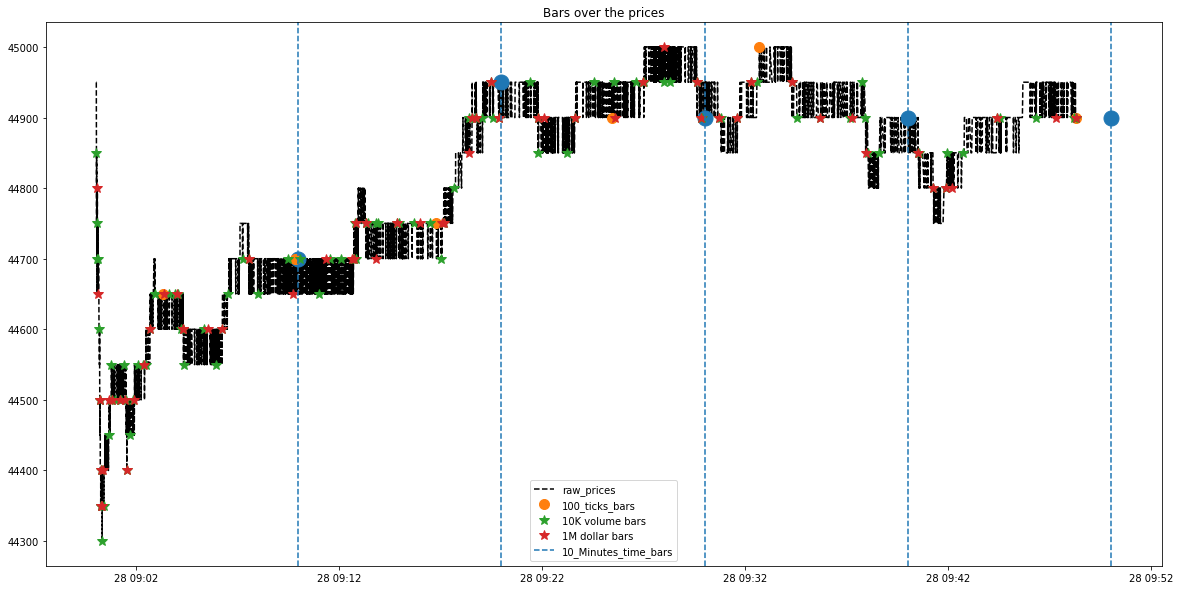

In [137]:
plt.figure(figsize=(20,10))
plt.title('Bars over the prices')
plt.plot(execution.index.values[:6000], execution.cur_price.values[:6000], label='raw_prices', ls = '--', color='black')
plt.plot(time_bars.index.values[:5], time_bars.close.values[:5], ls='', markersize=30, marker='.')
plt.plot(tick_bars.index.values[:6], tick_bars.close.values[:6], ls='', markersize=10, marker='o', label='100_ticks_bars')
plt.plot(volume_bars.index.values[:120], volume_bars.close.values[:120], ls='', markersize=10, marker='*', label='10K volume bars')
plt.plot(dollar_bars.index.values[:60], dollar_bars.close.values[:60], ls='', markersize=10, marker='*', label='1M dollar bars')

for e, t in enumerate(time_bars.index.values[:5]):
    if e == 0:
        plt.axvline(t, ls='--', label= '10_Minutes_time_bars')
    else:
        plt.axvline(t, ls='--')

plt.legend()
plt.show()

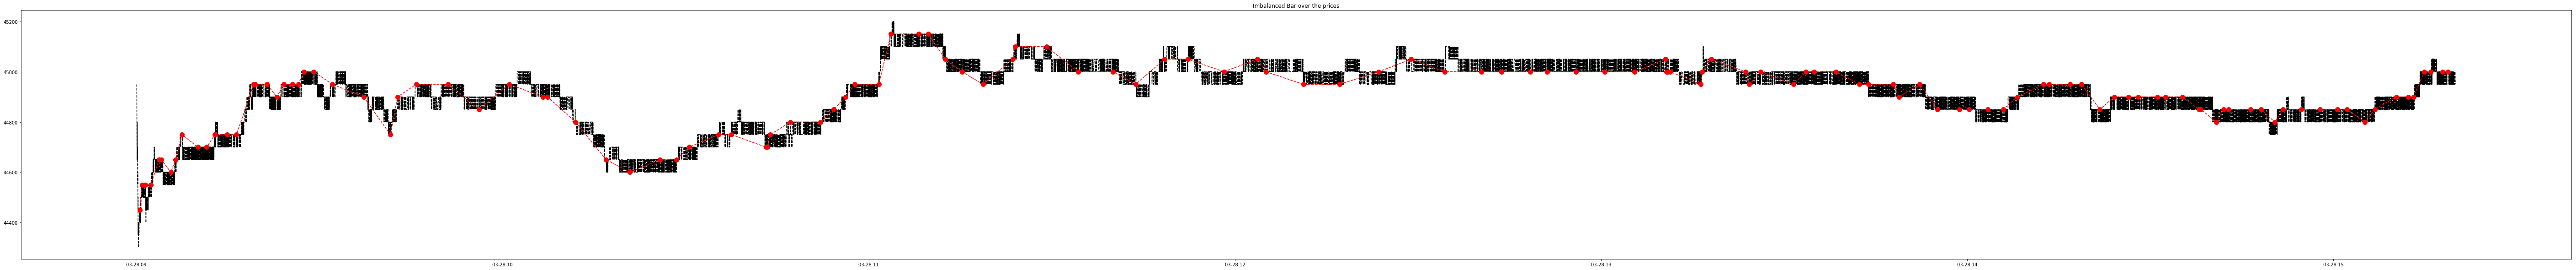

In [163]:
plt.figure(figsize=(100,10))
plt.title('Imbalanced Bar over the prices')
plt.plot(execution.index.values[:], execution.cur_price.values[:], label='raw_prices', ls = '--', color='black')
plt.plot(imbtick_bars.index.values[:],imbtick_bars.close.values[:], label='imbtick_bars', ls= '--',markersize=10, marker='o', color='red')